In [1]:
import sys
import os

sys.path.append(os.path.join('..'))

In [2]:
# Settings for autoreloading

%load_ext autoreload
%autoreload 2

In [3]:
from src.utils.seed import set_random_seed

# Set the random seed for deterministic operations.
SEED = 42
set_random_seed(SEED)

https://github.com/LMissher/STGNN/blob/main/model.py

In [4]:
import torch

# Set the device for training and querying the model.
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'The selected device is: "{DEVICE}"')

The selected device is: "cuda"


Link to download the datasets: https://graphmining.ai/temporal_datasets/

DEPENDENCY Pytables

# 1 PeMS-Bay Dataset

ORIGINAL PAPER: https://arxiv.org/pdf/1707.01926.pdf

***PeMS-Bay:***  This traffic dataset is collected by California Transportation Agencies (CalTrans) Performance Measurement System (PeMS). We select 325 sensors in the Bay Area
and collect 6 months of data ranging from Jan $1^{st}$ $2017$ to May $31^{th}$ $2017$ for the experiment.

In both of those datasets, we aggregate traffic speed readings into 5 minutes windows.

The total number of observed traffic data points is $16,937,179$.

In [5]:
# Set the base data directory.
BASE_DATA_DIR = os.path.join('..', 'data', 'pems-bay')

In [6]:
from src.data.data_extraction import get_node_values_dataframe

# Get the dataframe containing the node values at different timestamps for PeMS-Bay.
node_values_df = get_node_values_dataframe(
    os.path.join(BASE_DATA_DIR, 'pems-bay.h5'), turn_in_kmph=True)

In [7]:
node_values_df.head()

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
2017-01-01 00:00:00,114.907162,109.113523,113.458752,108.469786,110.722867,107.182310,107.504179,109.435392,107.504179,111.044736,...,110.722867,109.274458,110.722867,109.435392,111.366605,110.883802,113.297818,110.722867,114.424358,109.435392
2017-01-01 00:05:00,115.229030,108.630720,113.619686,108.630720,110.561933,107.182310,107.504179,109.113523,107.021376,109.757261,...,110.079130,108.308851,110.079130,108.791654,113.297818,110.722867,112.815014,110.079130,113.941555,108.469786
2017-01-01 00:10:00,115.229030,108.791654,112.975949,108.469786,110.561933,106.377638,107.504179,109.113523,106.538573,109.113523,...,110.079130,108.469786,110.079130,108.630720,112.975949,109.918195,112.332211,110.079130,113.458752,109.274458
2017-01-01 00:15:00,114.424358,108.630720,113.136883,109.435392,110.240064,107.343245,107.182310,108.952589,106.055770,109.113523,...,110.240064,108.630720,110.240064,108.630720,113.297818,110.561933,112.975949,110.079130,113.941555,108.791654
2017-01-01 00:20:00,115.389965,109.113523,112.975949,109.596326,110.079130,107.665114,106.377638,108.952589,106.377638,109.113523,...,110.240064,108.952589,110.240064,108.469786,112.010342,111.205670,112.654080,110.079130,114.263424,109.274458


In [8]:
from src.data.data_extraction import get_locations_dataframe

# Get the dataframe containing the latitude and longitude of each sensor.
locations_df = get_locations_dataframe(
    os.path.join(BASE_DATA_DIR, 'graph_sensor_locations_pems_bay.csv'),
    has_header=False)

In [9]:
locations_df.head()

,sensor_id,latitude,longitude
index,,,
0,400001,37.364085,-121.901149
1,400017,37.253303,-121.945440
2,400030,37.359087,-121.906538
3,400040,37.294949,-121.873109
4,400045,37.363402,-121.902233


# Data Analysis

In [10]:
from keplergl.keplergl import KeplerGl

In [11]:
kepler_map = KeplerGl(height=800)
kepler_map.add_data(data=locations_df, name="PeMS-Bay")

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [12]:
kepler_map

KeplerGl(data={'PeMS-Bay': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20…

# Missing Values Per-Node

In [13]:
import json

In [14]:
zeroes_per_node = {}

for c in node_values_df.columns:
    counts = (node_values_df[c] == 0.).sum()
    zeroes_per_node[c] = counts

In [15]:
locations_df_with_missing_values = locations_df.copy()
locations_df_with_missing_values['Missing Values'] = locations_df_with_missing_values.apply(
    lambda x: zeroes_per_node[x[0]], axis = 1
)


In [16]:
kepler_map = KeplerGl(height=800)#, config=kepler_map_config)

kepler_map.add_data(data=locations_df_with_missing_values, name='PeMS-Bay missing values per node')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


The map visualizes the total amount of missing values per node. Generally speaking, the amount of missing data is particularly low, with a maximum of 4 missing values per node. A comparison from this perspective from different time evaluation is not worth carrying out due to the minimalistic amount of missing data in general.

In [17]:
print('PeMS-Bay missing values per node:')
kepler_map

PeMS-Bay missing values per node:


KeplerGl(data={'PeMS-Bay missing values per node': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

In [18]:
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
import matplotlib.pyplot as plt

In [20]:
# Get the missing values count per timestamp.
missing_count = node_values_df.apply(lambda x: x == 0)

In [21]:
from src.data.data_analysis import group_dataframe_by_period

grouped_by_day_of_week = group_dataframe_by_period(
    missing_count, 'day_of_week', aggregation='sum')

In [22]:
from src.data.data_analysis import get_node_values_with_location_dataframe

node_values_location_df = get_node_values_with_location_dataframe(
    grouped_by_day_of_week, locations_df, metric_name='Missing count',
    turn_datetimes_to_timestamp=False)

In [23]:
kepler_map = KeplerGl(height=800)

kepler_map.add_data(data=node_values_location_df,
                    name='PeMS-Bay average missing values per node per day of the week')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [24]:
kepler_map

KeplerGl(data={'PeMS-Bay average missing values per node per day of the week': {'index': [0, 1, 2, 3, 4, 5, 6,…

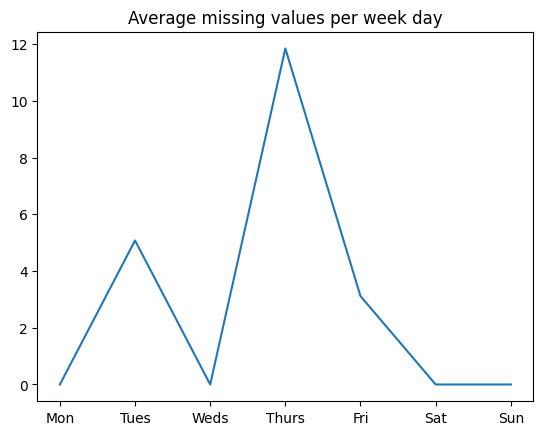

In [25]:
res = grouped_by_day_of_week.sum(axis=1)
f, ax = plt.subplots()
ax.plot(res.index.map(days), res.values)
#ax.set_xticks(res.index.strftime('%Y-%m-%d')[::25])
ax.set_title('Average missing values per week day')
plt.show()

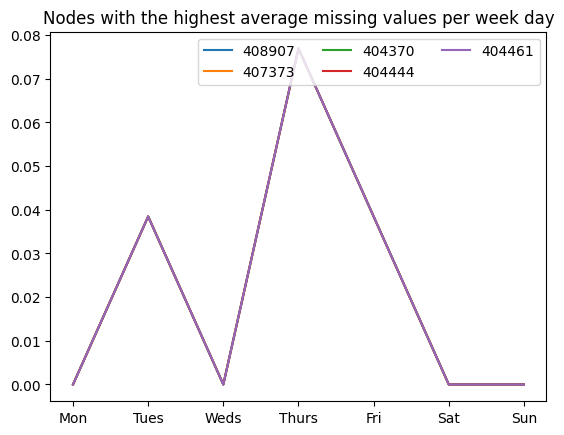

In [26]:
higest_missing_values_nodes = grouped_by_day_of_week.mean(axis=0).sort_values()[-5:]
res = grouped_by_day_of_week[higest_missing_values_nodes.index.values]
f, ax = plt.subplots()
ax.plot(res.index.map(days), res.values, label=res.columns.values)
#ax.set_xticks(res.index.strftime('%Y-%m-%d')[::25])
ax.set_title('Nodes with the highest average missing values per week day')
plt.legend(ncol=3)
plt.show()

In [27]:
kepler_map = KeplerGl(height=800)

kepler_map.add_data(data=locations_df[locations_df['sensor_id'].isin(higest_missing_values_nodes.index)])
kepler_map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'unnamed': {'index': [237, 240, 244, 308, 312], 'columns': ['sensor_id', 'latitude', 'longitude…

In [28]:
from src.data.data_analysis import group_dataframe_by_period

grouped_by_hour_of_day = group_dataframe_by_period(
    missing_count, 'hour_of_day', aggregation='sum')

In [29]:
from src.data.data_analysis import get_node_values_with_location_dataframe

node_values_location_df = get_node_values_with_location_dataframe(
    grouped_by_hour_of_day, locations_df, metric_name='Missing count',
    turn_datetimes_to_timestamp=False)

In [30]:
kepler_map = KeplerGl(height=800)

kepler_map.add_data(data=node_values_location_df,
                    name='PeMS-Bay average missing values per node per hour of the day')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [31]:
kepler_map

KeplerGl(data={'PeMS-Bay average missing values per node per hour of the day': {'index': [0, 1, 2, 3, 4, 5, 6,…

C:\Users\riccardo\AppData\Local\Temp\ipykernel_18820\1519355475.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{int(t):02d}:00' for t in ax.get_xticks()])


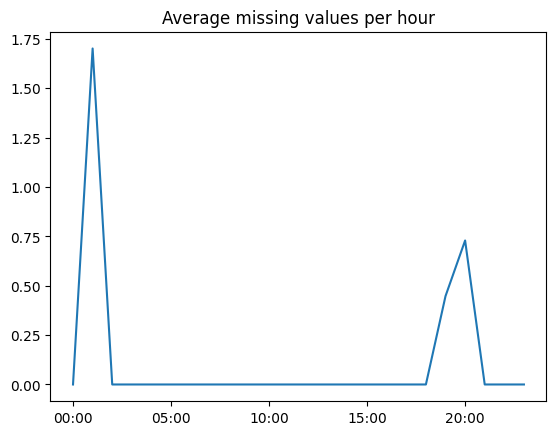

In [32]:
res = grouped_by_hour_of_day.sum(axis=1)
f, ax = plt.subplots()
ax.plot(res.index, res.values)
ax.set_xticklabels([f'{int(t):02d}:00' for t in ax.get_xticks()])
ax.set_title('Average missing values per hour')
plt.show()

C:\Users\riccardo\AppData\Local\Temp\ipykernel_18820\2028890959.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{int(t):02d}:00' for t in ax.get_xticks()])


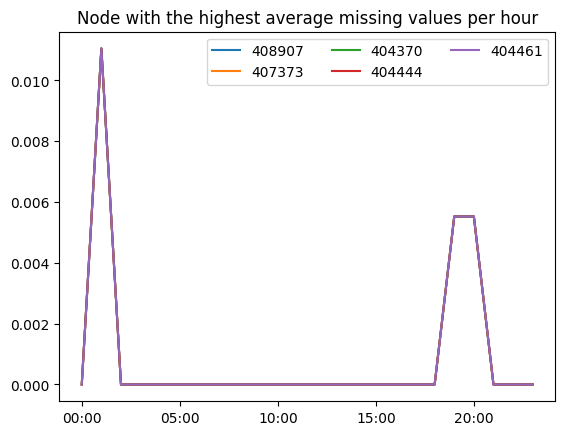

In [33]:
higest_missing_values_nodes = grouped_by_hour_of_day.mean(axis=0).sort_values()[-5:]
res = grouped_by_hour_of_day[higest_missing_values_nodes.index.values]
f, ax = plt.subplots()
ax.plot(res.index, res.values, label=res.columns.values)
ax.set_xticklabels([f'{int(t):02d}:00' for t in ax.get_xticks()])
ax.set_title('Node with the highest average missing values per hour')
plt.legend(ncol=3)
plt.show()

In [34]:
grouped_by_week_of_the_year = group_dataframe_by_period(
    missing_count, 'week_of_year', aggregation='sum')

In [35]:
from src.data.data_analysis import get_node_values_with_location_dataframe

node_values_location_df = get_node_values_with_location_dataframe(
    grouped_by_week_of_the_year, locations_df, metric_name='Missing count',
    turn_datetimes_to_timestamp=True)

In [36]:
kepler_map = KeplerGl(height=800)

kepler_map.add_data(data=node_values_location_df,
                    name='PeMS-Bay average missing values per node per week of the year')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [37]:
kepler_map

KeplerGl(data={'PeMS-Bay average missing values per node per week of the year': {'index': [0, 1, 2, 3, 4, 5, 6…

C:\Users\riccardo\AppData\Local\Temp\ipykernel_18820\582432308.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(map(format_week, ax.get_xticks()))


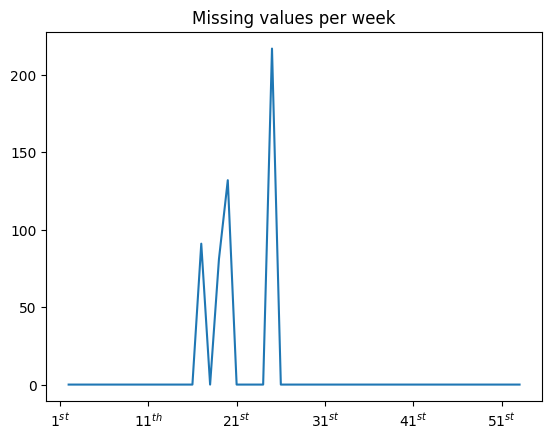

In [38]:
#grouped = grouped_by_week_of_the_year.sum()
grouped = grouped_by_week_of_the_year.groupby(
    grouped_by_week_of_the_year.to_timestamp().index.isocalendar().week.to_list())
grouped = grouped.sum()
res = grouped.sum(axis=1)
f, ax = plt.subplots()
ax.plot(res.index, res.values)
def format_week(week: float):
    date_suffix = [r'$^{th}$', r'$^{st}$', r'$^{nd}$', r'$^{rd}$']
    str_week = int(week) + 1
    if str_week % 10 in [1, 2, 3] and str_week % 100 not in [11, 12, 13]:
        return str(str_week) + date_suffix[str_week % 10]
    else:
        return str(str_week) + date_suffix[0]
ax.set_xticklabels(map(format_week, ax.get_xticks()))
ax.set_title('Missing values per week')
plt.show()

C:\Users\riccardo\AppData\Local\Temp\ipykernel_18820\3203620408.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(map(format_week, ax.get_xticks()))


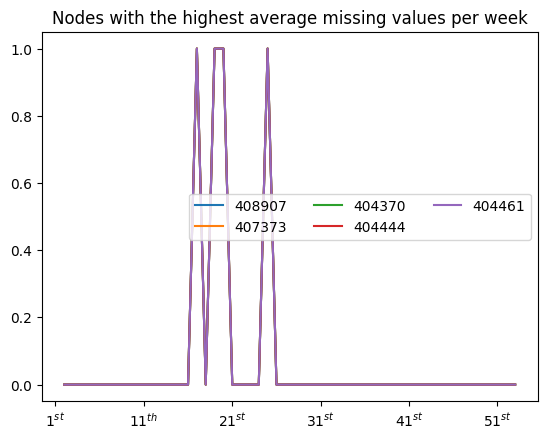

In [39]:
grouped = grouped_by_week_of_the_year.groupby(
    grouped_by_week_of_the_year.to_timestamp().index.isocalendar().week.to_list())
grouped = grouped.sum()
higest_missing_values_nodes = grouped.mean(axis=0).sort_values()[-5:]
res = grouped[higest_missing_values_nodes.index.values]
f, ax = plt.subplots()
ax.plot(res.index, res.values, label=res.columns.values)
def format_week(week: float):
    date_suffix = [r'$^{th}$', r'$^{st}$', r'$^{nd}$', r'$^{rd}$']
    str_week = int(week) + 1
    if str_week % 10 in [1, 2, 3] and str_week % 100 not in [11, 12, 13]:
        return str(str_week) + date_suffix[str_week % 10]
    else:
        return str(str_week) + date_suffix[0]
ax.set_xticklabels(map(format_week, ax.get_xticks()))
ax.set_title('Nodes with the highest average missing values per week')
plt.legend(ncols=3)
plt.show()

In [40]:
grouped_by_day_of_the_year = group_dataframe_by_period(
    missing_count, 'day_of_year', aggregation='sum')

In [41]:
from src.data.data_analysis import get_node_values_with_location_dataframe

node_values_location_df = get_node_values_with_location_dataframe(
    grouped_by_day_of_the_year, locations_df, metric_name='Missing count',
    turn_datetimes_to_timestamp=True)

In [42]:
kepler_map = KeplerGl(height=800)

kepler_map.add_data(data=node_values_location_df,
                    name='PeMS-Bay average missing values per node per day of the year')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [43]:
kepler_map

KeplerGl(data={'PeMS-Bay average missing values per node per day of the year': {'index': [0, 1, 2, 3, 4, 5, 6,…

C:\Users\riccardo\AppData\Local\Temp\ipykernel_18820\4225051034.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(map(format_week, ax.get_xticks()))


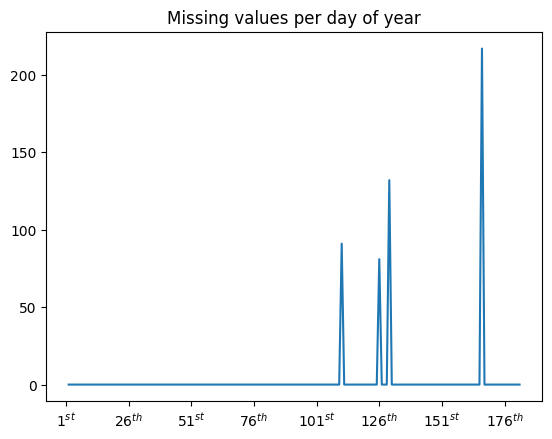

In [44]:
grouped = grouped_by_day_of_the_year.groupby(grouped_by_day_of_the_year.index.dayofyear)
res = grouped.sum()
res = res.sum(axis=1)
f, ax = plt.subplots()
ax.plot(res.index, res.values)
def format_week(week: float):
    date_suffix = [r'$^{th}$', r'$^{st}$', r'$^{nd}$', r'$^{rd}$']
    str_week = int(week) + 1
    if str_week % 10 in [1, 2, 3] and str_week % 100 not in [11, 12, 13]:
        return str(str_week) + date_suffix[str_week % 10]
    else:
        return str(str_week) + date_suffix[0]
ax.set_xticklabels(map(format_week, ax.get_xticks()))
ax.set_title('Missing values per day of year')
plt.show()

C:\Users\riccardo\AppData\Local\Temp\ipykernel_18820\3538780754.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(map(format_week, ax.get_xticks()))


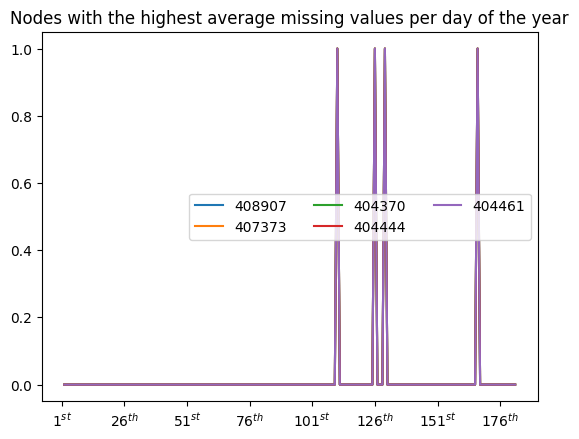

In [45]:
grouped = grouped_by_day_of_the_year.groupby(
    grouped_by_day_of_the_year.index.dayofyear)
grouped = grouped.sum()
higest_missing_values_nodes = grouped.mean(axis=0).sort_values()[-5:]
res = grouped[higest_missing_values_nodes.index.values]
f, ax = plt.subplots()
ax.plot(res.index, res.values, label=res.columns.values)
def format_week(week: float):
    date_suffix = [r'$^{th}$', r'$^{st}$', r'$^{nd}$', r'$^{rd}$']
    str_week = int(week) + 1
    if str_week % 10 in [1, 2, 3] and str_week % 100 not in [11, 12, 13]:
        return str(str_week) + date_suffix[str_week % 10]
    else:
        return str(str_week) + date_suffix[0]
ax.set_xticklabels(map(format_week, ax.get_xticks()))
ax.set_title('Nodes with the highest average missing values per day of the year')
plt.legend(ncols=3)
plt.show()

# Average Speed Per-Node

In [46]:
import numpy as np

avg_speed_per_node = {}

node_values_df_with_nan = node_values_df.replace(0, np.NaN)

for c in node_values_df_with_nan.columns:
    avg_speed = node_values_df_with_nan[c].mean(skipna=True)
    avg_speed_per_node[c] = avg_speed

In [47]:
locations_df_with_avg_speed = locations_df.copy()
locations_df_with_avg_speed['Average speed'] = locations_df_with_avg_speed.apply(
    lambda x: avg_speed_per_node[x[0]], axis = 1
)


In [48]:
kepler_map = KeplerGl(height=800)#), config=kepler_map_config)

kepler_map.add_data(data=locations_df_with_avg_speed, name='PeMS-Bay average speed per node')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


Judging by the map, the highest average speed per nodes are experienced in the San Jose central highway nodes. Other high average speed values can be seen in the highway crossings of Mountain View and Cupertino.

In [49]:
print('PeMS-Bay average speed per node:')
kepler_map

PeMS-Bay average speed per node:


KeplerGl(data={'PeMS-Bay average speed per node': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

In [50]:
import matplotlib.pyplot as plt
import numpy as np

In [51]:
days = { 0: 'Mon', 1: 'Tues', 2: 'Weds', 3: 'Thurs', 4: 'Fri', 5: 'Sat',
        6: 'Sun' }

In [52]:
# Get the average speed per timestamp.
node_speed_with_nans = node_values_df.replace(0, np.NaN)

In [53]:
from src.data.data_analysis import group_dataframe_by_period

grouped_by_day_of_week = group_dataframe_by_period(
    node_speed_with_nans, 'day_of_week', aggregation='mean')

In [54]:
from src.data.data_analysis import get_node_values_with_location_dataframe

node_values_location_df = get_node_values_with_location_dataframe(
    grouped_by_day_of_week, locations_df, metric_name='Average speed',
    turn_datetimes_to_timestamp=False)

In [55]:
kepler_map = KeplerGl(height=800)

kepler_map.add_data(data=node_values_location_df,
                    name='PeMS-Bay average speed per node per day of the week')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [56]:
kepler_map

KeplerGl(data={'PeMS-Bay average speed per node per day of the week': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,…

As expected, lowest average speeds are observed in weekdays, with values generally below 100 km/h. On the weekends the average speed increases to over 105 km/h. This behavior is expected as during weekdays the traffic flow should be higher. Notwithstanding, the difference of speed among weekdays and weekend days is not that high.

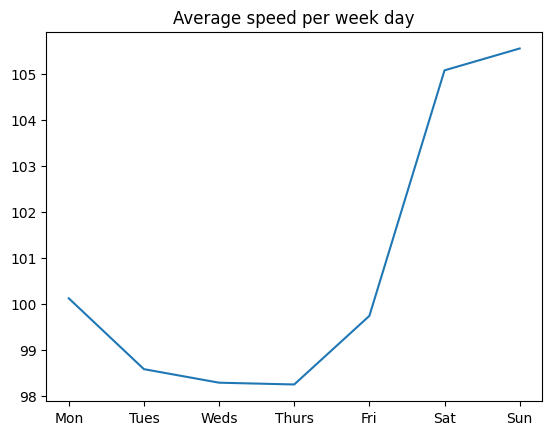

In [57]:
res = grouped_by_day_of_week.mean(axis=1, skipna=True)
f, ax = plt.subplots()
ax.plot(res.index.map(days), res.values)
#ax.set_xticks(res.index.strftime('%Y-%m-%d')[::25])
ax.set_title('Average speed per week day')
plt.show()

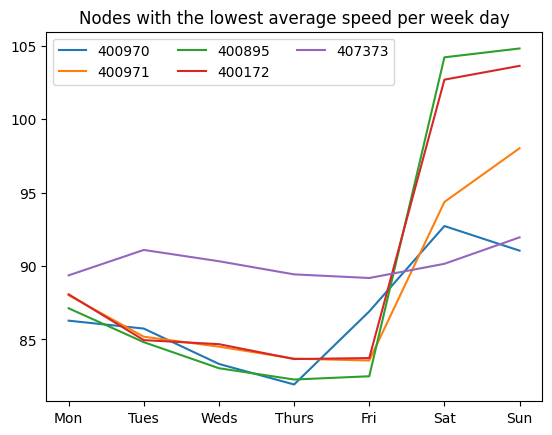

In [58]:
lowest_speed_nodes = grouped_by_day_of_week.mean(axis=0).sort_values()[:5]
res = grouped_by_day_of_week[lowest_speed_nodes.index.values]
f, ax = plt.subplots()
ax.plot(res.index.map(days), res.values, label=res.columns.values)
#ax.set_xticks(res.index.strftime('%Y-%m-%d')[::25])
ax.set_title('Nodes with the lowest average speed per week day')
plt.legend(ncol=3)
plt.show()

The nodes experiencing lowest average speeds are distributed in the area around San Jose.

In [59]:
kepler_map = KeplerGl(height=800)

kepler_map.add_data(data=locations_df[locations_df['sensor_id'].isin(lowest_speed_nodes.index)])
kepler_map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'unnamed': {'index': [26, 121, 133, 134, 308], 'columns': ['sensor_id', 'latitude', 'longitude'…

In [60]:
from src.data.data_analysis import group_dataframe_by_period

grouped_by_hour_of_day = group_dataframe_by_period(
    node_speed_with_nans, 'hour_of_day', aggregation='mean')

In [61]:
from src.data.data_analysis import get_node_values_with_location_dataframe

node_values_location_df = get_node_values_with_location_dataframe(
    grouped_by_hour_of_day, locations_df, metric_name='Average speed',
    turn_datetimes_to_timestamp=False)

In [62]:
kepler_map = KeplerGl(height=800)

kepler_map.add_data(data=node_values_location_df,
                    name='PeMS-Bay average missing values per node per hour of the day')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [63]:
kepler_map

KeplerGl(data={'PeMS-Bay average missing values per node per hour of the day': {'index': [0, 1, 2, 3, 4, 5, 6,…

Regarding the average speed per hour, The highest velocities are reached at night, while troughs are seen during roush hours. Namely 08:00 am and 05:00 pm.

C:\Users\riccardo\AppData\Local\Temp\ipykernel_18820\2282825890.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{int(t):02d}:00' for t in ax.get_xticks()])


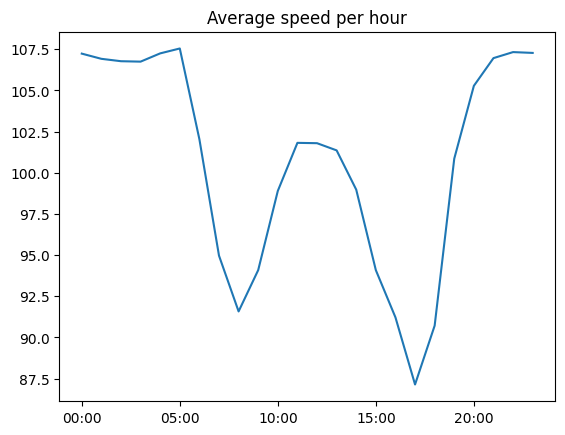

In [64]:
res = grouped_by_hour_of_day.mean(axis=1, skipna=True)
f, ax = plt.subplots()
ax.plot(res.index, res.values)
ax.set_xticklabels([f'{int(t):02d}:00' for t in ax.get_xticks()])
ax.set_title('Average speed per hour')
plt.show()

C:\Users\riccardo\AppData\Local\Temp\ipykernel_18820\3178881570.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{int(t):02d}:00' for t in ax.get_xticks()])


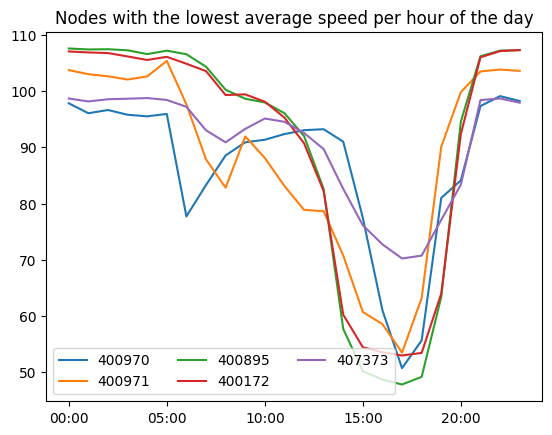

In [65]:
lowest_speed_nodes = grouped_by_hour_of_day.mean(axis=0).sort_values()[:5]
res = grouped_by_hour_of_day[lowest_speed_nodes.index.values]
f, ax = plt.subplots()
ax.plot(res.index, res.values, label=res.columns.values)
ax.set_xticklabels([f'{int(t):02d}:00' for t in ax.get_xticks()])
ax.set_title('Nodes with the lowest average speed per hour of the day')
plt.legend(ncol=3)
plt.show()

In [66]:
grouped_by_week_of_the_year = group_dataframe_by_period(
    node_speed_with_nans, 'week_of_year', aggregation='mean')

In [67]:
from src.data.data_analysis import get_node_values_with_location_dataframe

node_values_location_df = get_node_values_with_location_dataframe(
    grouped_by_week_of_the_year, locations_df, metric_name='Average speed',
    turn_datetimes_to_timestamp=True)

In [68]:
kepler_map = KeplerGl(height=800)

kepler_map.add_data(data=node_values_location_df,
                    name='PeMS-Bay average speed per node per week of the year')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [69]:
kepler_map

KeplerGl(data={'PeMS-Bay average speed per node per week of the year': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9…

During the year the average speed per week is constant around 100 km/h. Exception are observed around January where a speed of 108 km/h is reached and around July, where it slightly decreases at below 100 km/h

C:\Users\riccardo\AppData\Local\Temp\ipykernel_18820\824981790.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


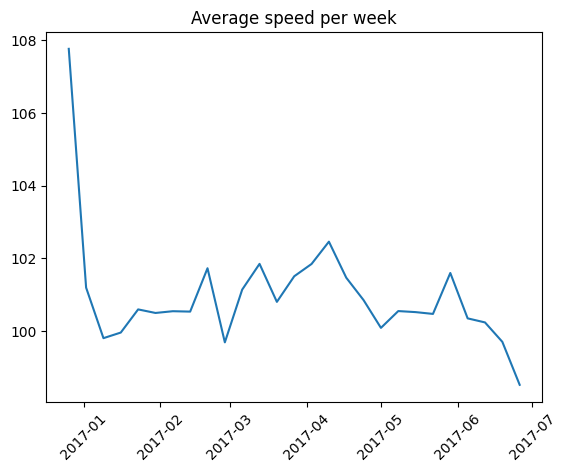

In [71]:
#grouped = grouped_by_week_of_the_year.sum()
grouped = grouped_by_week_of_the_year.groupby(
    grouped_by_week_of_the_year.index.to_timestamp())
res = grouped.mean()
res = res.mean(axis=1)
f, ax = plt.subplots()
ax.plot(res.index, res.values)
def format_week(week: float):
    date_suffix = [r'$^{th}$', r'$^{st}$', r'$^{nd}$', r'$^{rd}$']
    str_week = int(week) + 1
    if str_week % 10 in [1, 2, 3] and str_week % 100 not in [11, 12, 13]:
        return str(str_week) + date_suffix[str_week % 10]
    else:
        return str(str_week) + date_suffix[0]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Average speed per week')
plt.show()

C:\Users\riccardo\AppData\Local\Temp\ipykernel_14268\702136061.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(map(format_week, ax.get_xticks()))


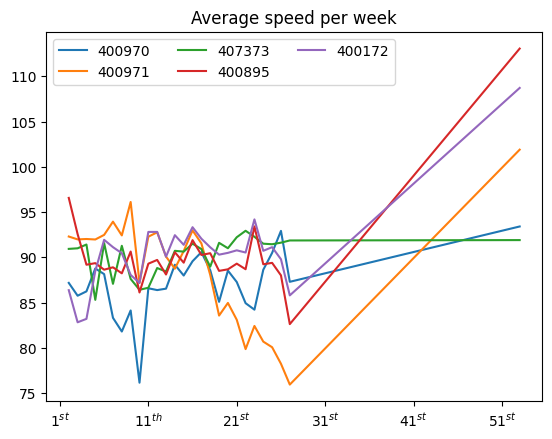

In [72]:
grouped = grouped_by_week_of_the_year.groupby(
    grouped_by_week_of_the_year.to_timestamp().index.isocalendar().week.to_list())
grouped = grouped.mean()
lowest_speed_nodes = grouped.mean(axis=0).sort_values()[:5]
res = grouped[lowest_speed_nodes.index.values]
f, ax = plt.subplots()
ax.plot(res.index, res.values, label=res.columns.values)
def format_week(week: float):
    date_suffix = [r'$^{th}$', r'$^{st}$', r'$^{nd}$', r'$^{rd}$']
    str_week = int(week) + 1
    if str_week % 10 in [1, 2, 3] and str_week % 100 not in [11, 12, 13]:
        return str(str_week) + date_suffix[str_week % 10]
    else:
        return str(str_week) + date_suffix[0]
ax.set_xticklabels(map(format_week, ax.get_xticks()))
ax.set_title('Average speed per week')
plt.legend(ncols=3)
plt.show()

In [72]:
grouped_by_day_of_the_year = group_dataframe_by_period(
    node_speed_with_nans, 'day_of_year', aggregation='mean')

In [73]:
from src.data.data_analysis import get_node_values_with_location_dataframe

node_values_location_df = get_node_values_with_location_dataframe(
    grouped_by_day_of_the_year, locations_df, metric_name='Average speed',
    turn_datetimes_to_timestamp=True)

In [74]:
kepler_map = KeplerGl(height=800)

kepler_map.add_data(data=node_values_location_df,
                    name='PeMS-Bay average speed per node per day of the year')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [75]:
kepler_map

KeplerGl(data={'PeMS-Bay average speed per node per day of the year': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,…

C:\Users\riccardo\AppData\Local\Temp\ipykernel_18820\4204229560.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(map(format_week, ax.get_xticks()))


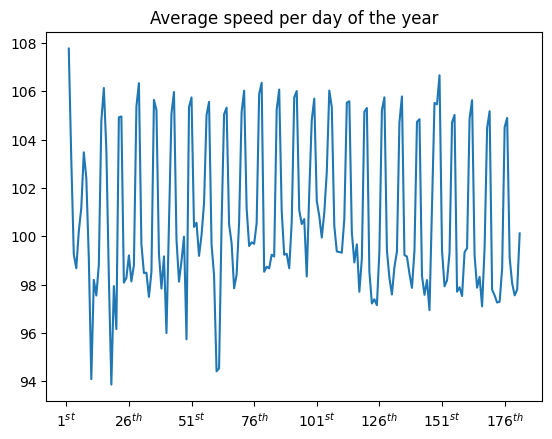

In [76]:
#grouped = grouped_by_week_of_the_year.sum()
grouped = grouped_by_day_of_the_year.groupby(
    grouped_by_day_of_the_year.to_timestamp().index.dayofyear)
res = grouped.mean()
res = res.mean(axis=1)
f, ax = plt.subplots()
ax.plot(res.index, res.values)
def format_week(week: float):
    date_suffix = [r'$^{th}$', r'$^{st}$', r'$^{nd}$', r'$^{rd}$']
    str_week = int(week) + 1
    if str_week % 10 in [1, 2, 3] and str_week % 100 not in [11, 12, 13]:
        return str(str_week) + date_suffix[str_week % 10]
    else:
        return str(str_week) + date_suffix[0]
ax.set_xticklabels(map(format_week, ax.get_xticks()))
ax.set_title('Average speed per day of the year')
plt.show()

C:\Users\riccardo\AppData\Local\Temp\ipykernel_18820\4001660213.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(map(format_week, ax.get_xticks()))


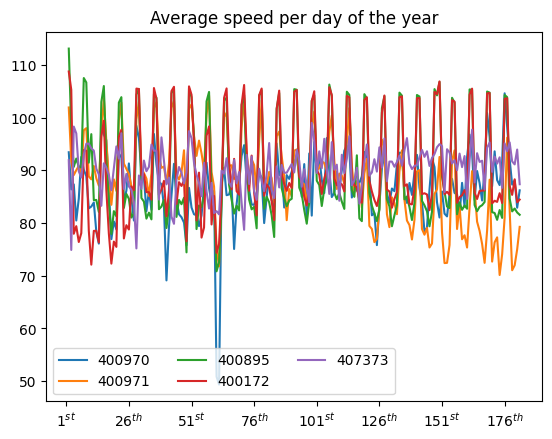

In [77]:
grouped = grouped_by_day_of_the_year.groupby(
    grouped_by_day_of_the_year.to_timestamp().index.dayofyear)
grouped = grouped.mean()
lowest_speed_nodes = grouped.mean(axis=0).sort_values()[:5]
res = grouped[lowest_speed_nodes.index.values]
f, ax = plt.subplots()
ax.plot(res.index, res.values, label=res.columns.values)
def format_week(week: float):
    date_suffix = [r'$^{th}$', r'$^{st}$', r'$^{nd}$', r'$^{rd}$']
    str_week = int(week) + 1
    if str_week % 10 in [1, 2, 3] and str_week % 100 not in [11, 12, 13]:
        return str(str_week) + date_suffix[str_week % 10]
    else:
        return str(str_week) + date_suffix[0]
ax.set_xticklabels(map(format_week, ax.get_xticks()))
ax.set_title('Average speed per day of the year')
plt.legend(ncols=3)
plt.show()

# With the most bottlenecks

In [78]:
all_node_values = node_values_df.to_numpy().ravel()
all_node_values = all_node_values[all_node_values > 0]

In [79]:
percentile = .05

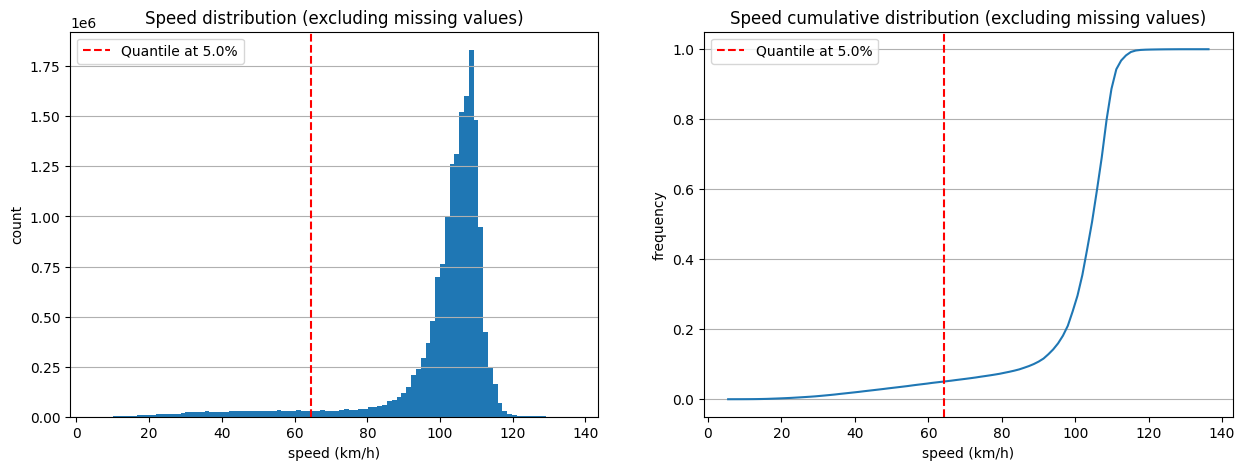

In [80]:
if percentile is not None:
    quantile = np.quantile(all_node_values, percentile)
else:
    quantile = None


hist, bin_edges = np.histogram(all_node_values, bins=100, range=None,
                               density=None, weights=None)

width = bin_edges[1] - bin_edges[0]
center = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(center, hist, width=width)
plt.xlabel('speed (km/h)')
plt.ylabel('count')
plt.title('Speed distribution (excluding missing values)')
plt.grid(axis='y')
if quantile is not None:
    plt.axvline(x = quantile, color = 'r', linestyle='--',
                label=f'Quantile at {percentile * 100}%')
plt.legend()

hist, bin_edges = np.histogram(all_node_values, bins=100, density=True)
cumsum = np.cumsum(hist) * (bin_edges[1] - bin_edges[0])
center = (bin_edges[:-1] + bin_edges[1:]) / 2

# Cumulative distribution
plt.subplot(1, 2, 2)
plt.plot(center, cumsum, '-')
plt.title('Speed cumulative distribution (excluding missing values)')
plt.xlabel('speed (km/h)')
plt.ylabel('frequency')
plt.grid(axis='y')
if quantile is not None:
    plt.axvline(x = quantile, color = 'r', linestyle='--',
                label=f'Quantile at {percentile * 100}%')
plt.legend()
plt.show()

In [81]:
quantile = np.quantile(all_node_values, percentile)

In [82]:
bottlenecks_per_node = {}

node_values_df_copy = node_values_df.copy()

for c in node_values_df_copy.columns:
    filtered_column = node_values_df_copy[c] < quantile
    filtered_column *= node_values_df_copy[c] > 0
    try:
        bottlenecks = filtered_column.value_counts()[True]
    except KeyError:
        bottlenecks = 0
    bottlenecks_per_node[c] = bottlenecks

In [83]:
locations_df_with_bottlenecks = locations_df.copy()
locations_df_with_bottlenecks[f'Bottlenecks below {quantile} km/h count'] = locations_df_with_bottlenecks.apply(
    lambda x: bottlenecks_per_node[x[0]], axis = 1
)


In [85]:
'''with open('../config/config-PeMS-Bay-bottleneck-per-node.json', 'r') as f:
    kepler_map_config = json.load(f)'''

"with open('../config/config-PeMS-Bay-bottleneck-per-node.json', 'r') as f:\n    kepler_map_config = json.load(f)"

In [84]:
kepler_map = KeplerGl(height=800)#, config=kepler_map_config)

kepler_map.add_data(data=locations_df_with_bottlenecks, name='PeMS-Bay bottlenecks per node')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


The highest amounts of bottlenecks are observed in the non-crossing parts of the highways, with an exception in the northern part of San Jose.

In [85]:
print('PeMS-Bay bottlenecks per node:')
kepler_map

PeMS-Bay bottlenecks per node:


KeplerGl(data={'PeMS-Bay bottlenecks per node': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…

In [86]:
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

In [87]:
import matplotlib.pyplot as plt


In [88]:
# Get the missing values count per timestamp.
bottlenecks = node_values_df.apply(lambda x: (x > 0) & (x < quantile))
bottlenecks.index = node_values_df.index

In [89]:
from src.data.data_analysis import group_dataframe_by_period

grouped_by_day_of_week = group_dataframe_by_period(
    bottlenecks, 'day_of_week', aggregation='sum')

In [90]:
kepler_map = KeplerGl(height=800)

kepler_map.add_data(data=node_values_location_df,
                    name='PeMS-Bay average missing values per node per day of the week')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [91]:
kepler_map

KeplerGl(data={'PeMS-Bay average missing values per node per day of the week': {'index': [0, 1, 2, 3, 4, 5, 6,…

In [92]:
from src.data.data_analysis import get_node_values_with_location_dataframe

node_values_location_df = get_node_values_with_location_dataframe(
    grouped_by_day_of_week, locations_df, metric_name='Bottlenecks count',
    turn_datetimes_to_timestamp=False)

Opposite for what regards the average speed, the major bottlenecks are observed during weekdays, while on the weekend the number of average bottlenecks per node is below 1000. This reflects the fact that people drive more during the weekdays.

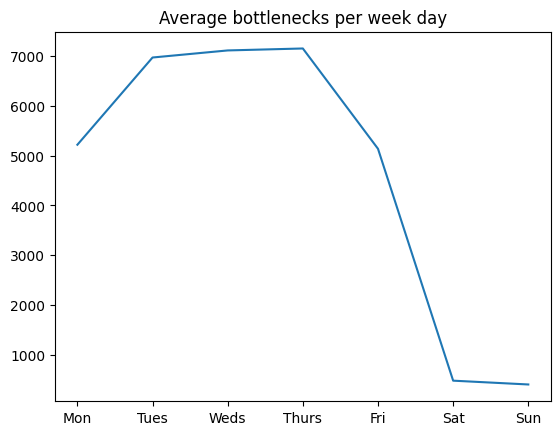

In [93]:
res = grouped_by_day_of_week.sum(axis=1)
f, ax = plt.subplots()
ax.plot(res.index.map(days), res.values)
#ax.set_xticks(res.index.strftime('%Y-%m-%d')[::25])
ax.set_title('Average bottlenecks per week day')
plt.show()

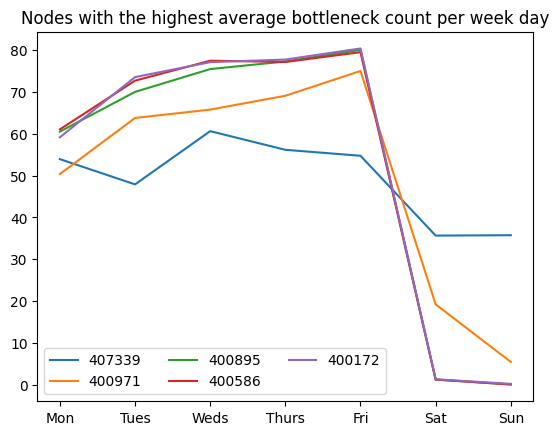

In [94]:
highest_bottlenecks_nodes = grouped_by_day_of_week.mean(axis=0).sort_values()[-5:]
res = grouped_by_day_of_week[highest_bottlenecks_nodes.index.values]
f, ax = plt.subplots()
ax.plot(res.index.map(days), res.values, label=res.columns.values)
#ax.set_xticks(res.index.strftime('%Y-%m-%d')[::25])
ax.set_title('Nodes with the highest average bottleneck count per week day')
plt.legend(ncol=3)
plt.show()

In [95]:
kepler_map = KeplerGl(height=800)

kepler_map.add_data(data=locations_df[locations_df['sensor_id'].isin(highest_bottlenecks_nodes.index)])
kepler_map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'unnamed': {'index': [26, 82, 121, 134, 295], 'columns': ['sensor_id', 'latitude', 'longitude']…

In [96]:
from src.data.data_analysis import group_dataframe_by_period

grouped_by_hour_of_day = group_dataframe_by_period(
    bottlenecks, 'hour_of_day', aggregation='sum')

In [99]:
from src.data.data_analysis import get_node_values_with_location_dataframe

node_values_location_df = get_node_values_with_location_dataframe(
    grouped_by_hour_of_day, locations_df, metric_name='Bottlenecks count',
    turn_datetimes_to_timestamp=False)

In [100]:
kepler_map = KeplerGl(height=800)

kepler_map.add_data(data=node_values_location_df,
                    name='PeMS-Bay average bottleneck counts per node per hour of the day')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [101]:
kepler_map

KeplerGl(data={'PeMS-Bay average bottleneck counts per node per hour of the day': {'index': [0, 1, 2, 3, 4, 5,…

The distribution of average bottlenecks per hour illustrates that the highest traffick bottlenecks are seen during rush hours: $08:00$ a.m. and $05:00$ p.m.Expectedly, lowest amounts of bottlenecks happen at night.

C:\Users\riccardo\AppData\Local\Temp\ipykernel_18820\3934042038.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{int(t):02d}:00' for t in ax.get_xticks()])


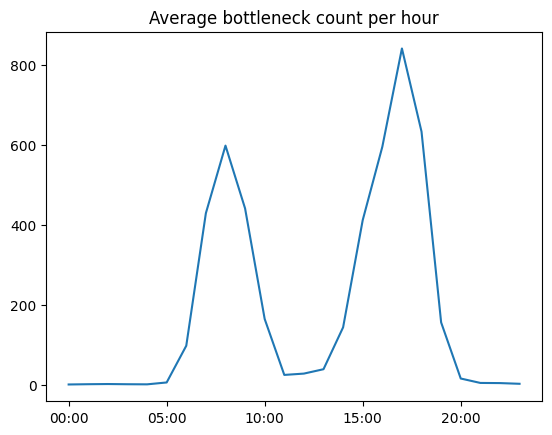

In [97]:
res = grouped_by_hour_of_day.sum(axis=1)
f, ax = plt.subplots()
ax.plot(res.index, res.values)
ax.set_xticklabels([f'{int(t):02d}:00' for t in ax.get_xticks()])
ax.set_title('Average bottleneck count per hour')
plt.show()

C:\Users\riccardo\AppData\Local\Temp\ipykernel_18820\1001871754.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{int(t):02d}:00' for t in ax.get_xticks()])


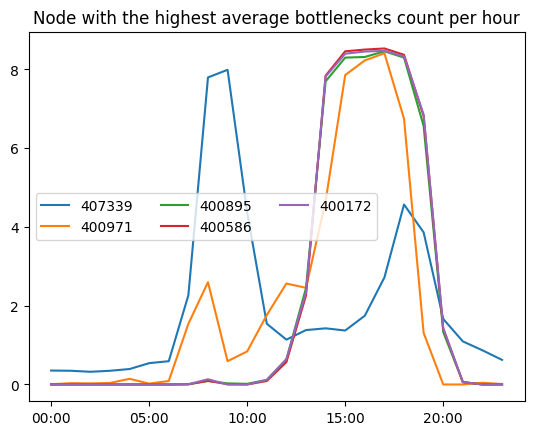

In [98]:
higest_bottleneck_nodes = grouped_by_hour_of_day.mean(axis=0).sort_values()[-5:]
res = grouped_by_hour_of_day[higest_bottleneck_nodes.index.values]
f, ax = plt.subplots()
ax.plot(res.index, res.values, label=res.columns.values)
ax.set_xticklabels([f'{int(t):02d}:00' for t in ax.get_xticks()])
ax.set_title('Node with the highest average bottlenecks count per hour')
plt.legend(ncol=3)
plt.show()

In [99]:
grouped_by_week_of_the_year = group_dataframe_by_period(
    bottlenecks, 'week_of_year', aggregation='sum')

In [100]:
from src.data.data_analysis import get_node_values_with_location_dataframe

node_values_location_df = get_node_values_with_location_dataframe(
    grouped_by_week_of_the_year, locations_df, metric_name='Bottlenecks count',
    turn_datetimes_to_timestamp=True)

In [106]:
kepler_map = KeplerGl(height=800)

kepler_map.add_data(data=node_values_location_df,
                    name='PeMS-Bay average bottleneck count per node per week of the year')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [107]:
kepler_map

KeplerGl(data={'PeMS-Bay average bottleneck count per node per week of the year': {'index': [0, 1, 2, 3, 4, 5,…

The bottleneck distribution is erratic during the weeks, but highest values are generally observed during the first weeks of the months with the exception of April and June.

C:\Users\riccardo\AppData\Local\Temp\ipykernel_18820\26030674.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


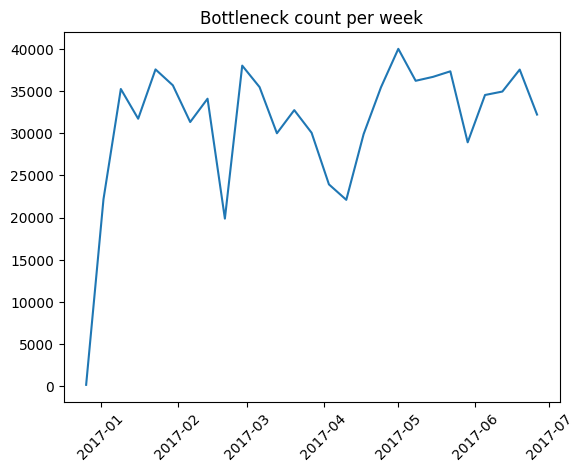

In [101]:
#grouped = grouped_by_week_of_the_year.sum()
grouped = grouped_by_week_of_the_year.groupby(
    grouped_by_week_of_the_year.index.to_timestamp())
grouped = grouped.sum()
res = grouped.sum(axis=1)
f, ax = plt.subplots()
ax.plot(res.index, res.values)
def format_week(week: float):
    date_suffix = [r'$^{th}$', r'$^{st}$', r'$^{nd}$', r'$^{rd}$']
    str_week = int(week) + 1
    if str_week % 10 in [1, 2, 3] and str_week % 100 not in [11, 12, 13]:
        return str(str_week) + date_suffix[str_week % 10]
    else:
        return str(str_week) + date_suffix[0]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Bottleneck count per week')
plt.show()

C:\Users\riccardo\AppData\Local\Temp\ipykernel_18820\4013950675.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(map(format_week, ax.get_xticks()))


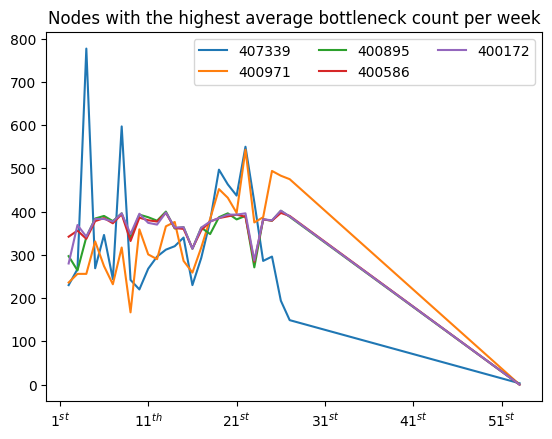

In [102]:
grouped = grouped_by_week_of_the_year.groupby(
    grouped_by_week_of_the_year.to_timestamp().index.isocalendar().week.to_list())
grouped = grouped.sum()
higest_missing_values_nodes = grouped.mean(axis=0).sort_values()[-5:]
res = grouped[higest_missing_values_nodes.index.values]
f, ax = plt.subplots()
ax.plot(res.index, res.values, label=res.columns.values)
def format_week(week: float):
    date_suffix = [r'$^{th}$', r'$^{st}$', r'$^{nd}$', r'$^{rd}$']
    str_week = int(week) + 1
    if str_week % 10 in [1, 2, 3] and str_week % 100 not in [11, 12, 13]:
        return str(str_week) + date_suffix[str_week % 10]
    else:
        return str(str_week) + date_suffix[0]
ax.set_xticklabels(map(format_week, ax.get_xticks()))
ax.set_title('Nodes with the highest average bottleneck count per week')
plt.legend(ncols=3)
plt.show()

In [110]:
grouped_by_day_of_the_year = group_dataframe_by_period(
    bottlenecks, 'day_of_year', aggregation='sum')

In [111]:
from src.data.data_analysis import get_node_values_with_location_dataframe

node_values_location_df = get_node_values_with_location_dataframe(
    grouped_by_day_of_the_year, locations_df, metric_name='Missing count',
    turn_datetimes_to_timestamp=True)

In [112]:
kepler_map = KeplerGl(height=800)

kepler_map.add_data(data=node_values_location_df,
                    name='PeMS-Bay average bottleneck count per node per day of the year')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [113]:
kepler_map

KeplerGl(data={'PeMS-Bay average bottleneck count per node per day of the year': {'index': [0, 1, 2, 3, 4, 5, …

C:\Users\riccardo\AppData\Local\Temp\ipykernel_14268\3895628774.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(map(format_week, ax.get_xticks()))


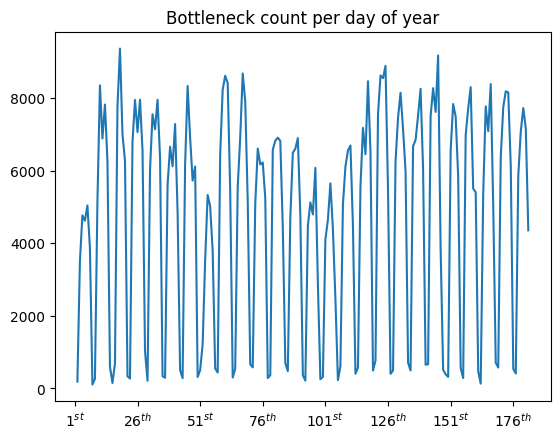

In [114]:
grouped = grouped_by_day_of_the_year.groupby(grouped_by_day_of_the_year.index.dayofyear)
res = grouped.sum()
res = res.sum(axis=1)
f, ax = plt.subplots()
ax.plot(res.index, res.values)
def format_week(week: float):
    date_suffix = [r'$^{th}$', r'$^{st}$', r'$^{nd}$', r'$^{rd}$']
    str_week = int(week) + 1
    if str_week % 10 in [1, 2, 3] and str_week % 100 not in [11, 12, 13]:
        return str(str_week) + date_suffix[str_week % 10]
    else:
        return str(str_week) + date_suffix[0]
ax.set_xticklabels(map(format_week, ax.get_xticks()))
ax.set_title('Bottleneck count per day of year')
plt.show()

C:\Users\riccardo\AppData\Local\Temp\ipykernel_14268\1060341445.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(map(format_week, ax.get_xticks()))


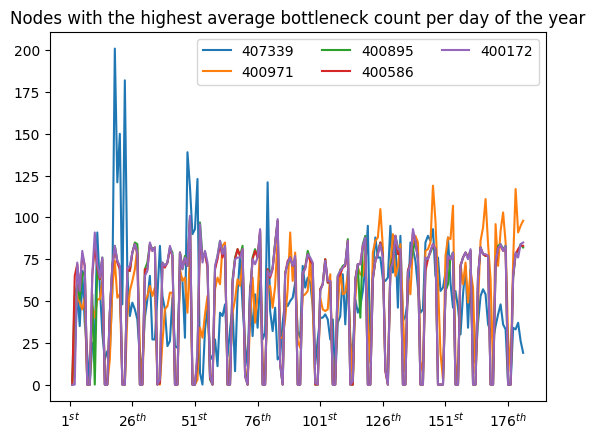

In [115]:
grouped = grouped_by_day_of_the_year.groupby(
    grouped_by_day_of_the_year.index.dayofyear)
grouped = grouped.sum()
higest_missing_values_nodes = grouped.mean(axis=0).sort_values()[-5:]
res = grouped[higest_missing_values_nodes.index.values]
f, ax = plt.subplots()
ax.plot(res.index, res.values, label=res.columns.values)
def format_week(week: float):
    date_suffix = [r'$^{th}$', r'$^{st}$', r'$^{nd}$', r'$^{rd}$']
    str_week = int(week) + 1
    if str_week % 10 in [1, 2, 3] and str_week % 100 not in [11, 12, 13]:
        return str(str_week) + date_suffix[str_week % 10]
    else:
        return str(str_week) + date_suffix[0]
ax.set_xticklabels(map(format_week, ax.get_xticks()))
ax.set_title('Nodes with the highest average bottleneck count per day of the year')
plt.legend(ncols=3)
plt.show()